In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import os

In [3]:
print(os.listdir("/content/drive/MyDrive/AIgroupZaraIrina/Open_science(for_Nurlan&Irina)"))

['Open science analysis data.ipynb', 'OS Team 3 Survey for CRI Students (Responses).gsheet', 'data.csv', 'dataprof.gsheet', 'Copy of Open science analysis data.ipynb', 'dataprof.csv']


In [4]:
# prof
dataprof = pd.read_csv('/content/drive/MyDrive/AIgroupZaraIrina/Open_science(for_Nurlan&Irina)/dataprof.csv')
dataprof.head(1)

,Timestamp,Which track do you work with?,Gender,Please describe what the term interdisciplinarity means to you,How important do you think interdisciplinary work is for your field?,"How important, if at all, do you think interdisciplinarity is for society in general?",How would you rate the ability of the curriculum proposed on paper by the AIRE Master (all three tracks) to meaningfully connect a variety of disciplines?,How would you assess the cross conversation between different tracks of the AIRE Master?,How would you rate the AIRE program in terms of its ability to offer opportunities for students to interact with teachers of other tracks?,How would you assess the interdisciplinarity in the learning objectives of the classes during the Bootcamp?,"How would you assess the interdisciplinarity in the learning objectives of the semester-long classes within the track that you teach (the whole track, not your course specifically)?","How interdisciplinary do you think your course is? That is, how well do you think the design of your course allows your students to make meaningful and effective connections to other disciplines?","According to your interaction with your students, how satisfied do you think they are with the range of interdisciplinary activities at the CRI?",Please rate the following statements (1 being the one you agree the most with and 8 being the one you disagree the most with): [Interdisciplinary research usually has less scientific depth.],Please rate the following statements (1 being the one you agree the most with and 8 being the one you disagree the most with): [Interdisciplinary research does not require everyone to converge on definitions based on one specific discipline],Please rate the following statements (1 being the one you agree the most with and 8 being the one you disagree the most with): [Any complex problem facing society today requires interdisciplinary research],Please rate the following statements (1 being the one you agree the most with and 8 being the one you disagree the most with): [Interdisciplinary research needs the contribution of non-academics.],Please rate the following statements (1 being the one you agree the most with and 8 being the one you disagree the most with): [Peers in my core discipline(s) often consider interdisciplinary research less rigorous],Please rate the following statements (1 being the one you agree the most with and 8 being the one you disagree the most with): [Interdisciplinary research often provides better job opportunities],Please rate the following statements (1 being the one you agree the most with and 8 being the one you disagree the most with): [Additional training is required to undertake interdisciplinary research],Please rate the following statements (1 being the one you agree the most with and 8 being the one you disagree the most with): [Interdisciplinary research provides more learning opportunities through the interaction with experts in other disciplines],Please provide any suggestions on how the current status of interdisciplinary activities at the CRI can be improved
0,11/24/2021 16:43:40,"M1 Digital Sciences, M1 Learning Sciences, M1 ...",Male,Combining in research or teaching academic dis...,8.0,5.0,7.0,8.0,5.0,7.0,6.0,8,6.0,5.0,6.0,1.0,3.0,7.0,8.0,4.0,2,A visual map of research / teaching regarding ...


In [5]:
# student
data = pd.read_csv('/content/drive/MyDrive/AIgroupZaraIrina/Open_science(for_Nurlan&Irina)/data.csv')
data.head(1)

,Timestamp,What's your track?,How old are you?,Gender,Please describe what the term interdisciplinarity means to you?,How important do you think interdisciplinary work is for your field?,How important do you think interdisciplinarity is for society in general?,How would you rate the ability of the curriculum proposed by the AIRE Master to meaningfully connect a variety of disciplines?,How would you assess the cross conversation between different tracks of the AIRE Master?,How would you rate the AIRE program in terms of its ability to offer opportunities for students to interact with teachers of other tracks?,How would you assess the interdisciplinarity of the classes during the Bootcamp?,How would you rate the degree of interdisciplinarity of the courses delivered during the AIRE Master?,How would you rate the ability of the projects proposed by the AIRE Master to reach out to a plurality of disciplines?,How satisfied are you with the range of interdisciplinary activities initiated by the Master AIRE program?,Please provide any suggestions on how the current status of interdisciplinary activities at the CRI can be improved
0,11/27/2021 12:49:44,M1 Digital Sciences,28,Male,one field interacting with another,7,8,5,4,3,3,4,4,2,NaN


In [6]:
data.shape

(31, 15)

In [7]:
dataprof.shape

(15, 22)

In [8]:
b = pd.DataFrame(dataprof.iloc[:,1])
b["Which track do you work with?"] = b["Which track do you work with?"].str.split(", ")
b = b.explode("Which track do you work with?")
b. head()

,Which track do you work with?
0,M1 Digital Sciences
0,M1 Learning Sciences
0,M1 Life Sciences
1,M1 Digital Sciences
1,M1 Learning Sciences


In [9]:
b = b.value_counts()
b

Which track do you work with?
M1 Life Sciences                 8
M1 Digital Sciences              7
M2 Life Sciences                 4
M2 Digital Sciences              4
M1 Learning Sciences             3
M2 Learning Sciences             2
dtype: int64

In [10]:
bis = list(b.index)
bis

[('M1 Life Sciences',),
 ('M1 Digital Sciences',),
 ('M2 Life Sciences',),
 ('M2 Digital Sciences',),
 ('M1 Learning Sciences',),
 ('M2 Learning Sciences',)]

In [11]:
bb = []

for i in bis:
  i = str(i)
  i = i.replace("('", "")
  i = i.replace("',)", "")
  bb.append(i)
bb

['M1 Life Sciences',
 'M1 Digital Sciences',
 'M2 Life Sciences',
 'M2 Digital Sciences',
 'M1 Learning Sciences',
 'M2 Learning Sciences']

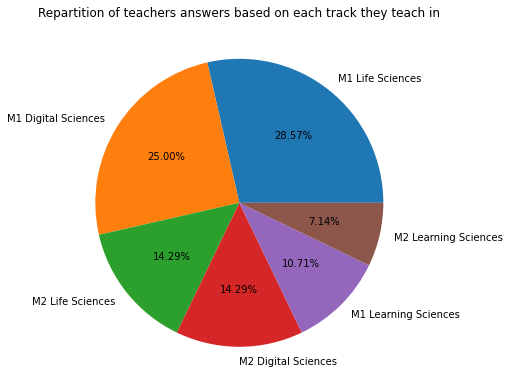

In [12]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')


ax.pie(b, labels = bb, autopct='%1.2f%%')
#plt.legend(b, labels = bb, loc="center left")
plt.title('Repartition of teachers answers based on each track they teach in')
plt.show()

In [13]:
a = data.iloc[:,1].value_counts()
a.index

Index(['M1 Digital Sciences', 'M1 Learning Sciences', 'M1 Life Sciences',
       'M2 Life Sciences', 'M2 Learning Sciences', 'M2 Digital Sciences'],
      dtype='object')

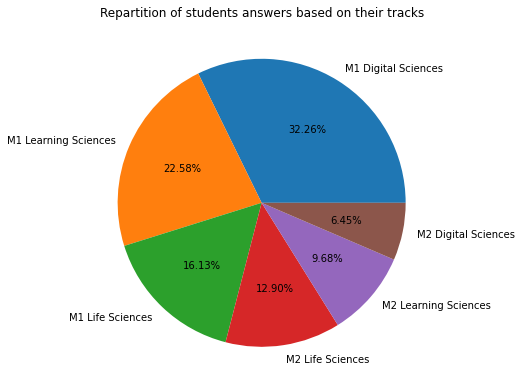

In [14]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')


ax.pie(a, labels = a.index, autopct='%1.2f%%')
#plt.legend(a, labels = a.index, loc="center left")
plt.title('Repartition of students answers based on their tracks')
plt.show()

In [25]:
q1 = pd.DataFrame(data.iloc[:,[5]])
q1prof = pd.DataFrame(dataprof.iloc[:,[4]])

In [16]:
ex = q1.value_counts(normalize=True, sort=True, ascending=False)
ex

How important do you think interdisciplinary work is for your field? 
9                                                                        0.322581
10                                                                       0.290323
8                                                                        0.290323
7                                                                        0.096774
dtype: float64

In [17]:
exprof = q1prof.value_counts(normalize=True, sort=True, ascending=False)
exprof

How important do you think interdisciplinary work is for your field?
10.0                                                                    0.400000
8.0                                                                     0.266667
7.0                                                                     0.200000
8.5                                                                     0.066667
6.0                                                                     0.066667
dtype: float64

Text(0, 0.5, 'Percentage')

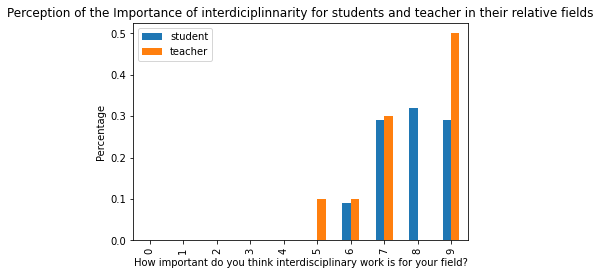

In [22]:
student = [0, 0, 0, 0, 0, 0, 0.09, 0.29, 0.32, 0.29]
teacher = [0, 0, 0, 0, 0, 0.1, 0.1, 0.3, 0, 0.5]

df = pd.DataFrame({'student': student, 'teacher': teacher})
ax = df.plot.bar(title='Perception of the Importance of interdiciplinnarity for students and teacher in their relative fields')
ax.set_xlabel('How important do you think interdisciplinary work is for your field?')
ax.set_ylabel('Percentage')


In [26]:
q1 = q1.rename(columns={"How important do you think interdisciplinary work is for your field? ": "student"}, errors="raise")
#q1 = q1.melt()
q1.head()

,student
0,7
1,8
2,9
3,7
4,7


In [27]:
q1prof = q1prof.rename(columns={"How important do you think interdisciplinary work is for your field?": "teacher"}, errors="raise")
#q1prof = q1prof.melt()
q1prof.head()

,teacher
0,8.0
1,10.0
2,10.0
3,8.0
4,10.0


In [28]:
frames = [q1, q1prof]

result = pd.concat(frames)

In [31]:
# to run if we melted the data
#result['value']=result['value'].astype(str) # or str for string

In [32]:
result.head()

,student,teacher
0,7.0,NaN
1,8.0,NaN
2,9.0,NaN
3,7.0,NaN
4,7.0,NaN


In [33]:
q1.head()

,student
0,7
1,8
2,9
3,7
4,7


In [34]:
q1prof.head()

,teacher
0,8.0
1,10.0
2,10.0
3,8.0
4,10.0


In [35]:
result1 = pd.concat([q1, q1prof], axis=1)

In [36]:
result1

,student,teacher
0,7,8.0
1,8,10.0
2,9,10.0
3,7,8.0
4,7,10.0
5,10,6.0
6,10,7.0
7,9,10.0
8,9,10.0
9,10,8.0


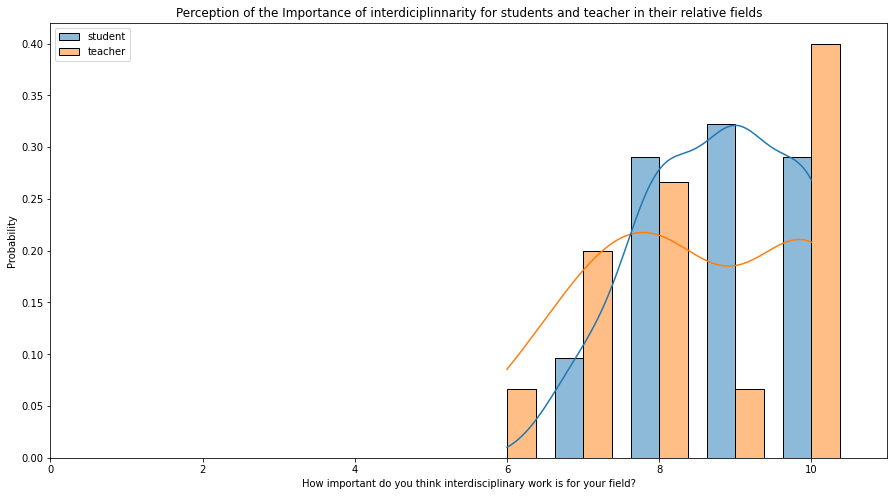

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot melted dataframe in a single command
plt.figure(figsize = (15,8))
plt.xlim(0, 11)
plt.xlabel('How important do you think interdisciplinary work is for your field?') 
  
# displaying the title
plt.title("Perception of the Importance of interdiciplinnarity for students and teacher in their relative fields")

sns.histplot([result1['student'], result1['teacher']], stat = 'probability', kde = True, multiple='dodge', discrete = True, common_norm=False, shrink=.75, bins=5, common_bins= True);

#sns.histplot([result1['student'], result1['teacher']], stat = 'probability', multiple='dodge', discrete = True, common_norm=True, shrink=.75, bins=5, color = 'orange', common_bins= True);


In [38]:
def transform(q, qprof):
  q = data.iloc[:,[q]]
  qprof = dataprof.iloc[:,[qprof]]

  q = q.set_axis(["student"], axis='columns')
  qprof = qprof.set_axis(["teacher"], axis='columns')
  
  result = pd.concat([q, qprof], axis=1)
  return result


In [39]:
isinstance(transform(11, 10), pd.DataFrame)

True

In [40]:
result2 = transform(11, 10)
result2.head()

,student,teacher
0,4,6.0
1,3,7.0
2,9,4.0
3,5,6.0
4,5,8.0


In [41]:
q2 = pd.DataFrame(data.iloc[:,[13]])
q2prof = pd.DataFrame(dataprof.iloc[:,[12]])
q2.head()

,How satisfied are you with the range of interdisciplinary activities initiated by the Master AIRE program?
0,2
1,4
2,9
3,6
4,4


In [42]:
q2prof.head()

,"According to your interaction with your students, how satisfied do you think they are with the range of interdisciplinary activities at the CRI?"
0,6.0
1,6.0
2,1.0
3,6.0
4,8.0


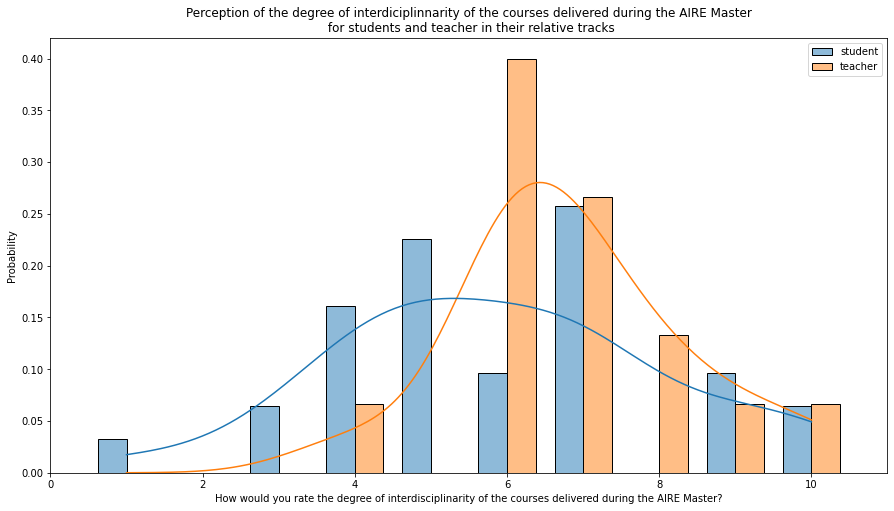

In [43]:
# plot melted dataframe in a single command
plt.figure(figsize = (15,8))
plt.xlim(0, 11)
plt.xlabel('How would you rate the degree of interdisciplinarity of the courses delivered during the AIRE Master?') 
  
# displaying the title
plt.title("Perception of the degree of interdiciplinnarity of the courses delivered during the AIRE Master\n for students and teacher in their relative tracks")

sns.histplot([result2['student'], result2['teacher']], stat = 'probability', kde = True, multiple='dodge', discrete = True, common_norm=False, shrink=.75, bins=5, common_bins= True);

In [44]:
result3 = transform(13, 12)
result3.head()

,student,teacher
0,2,6.0
1,4,6.0
2,9,1.0
3,6,6.0
4,4,8.0


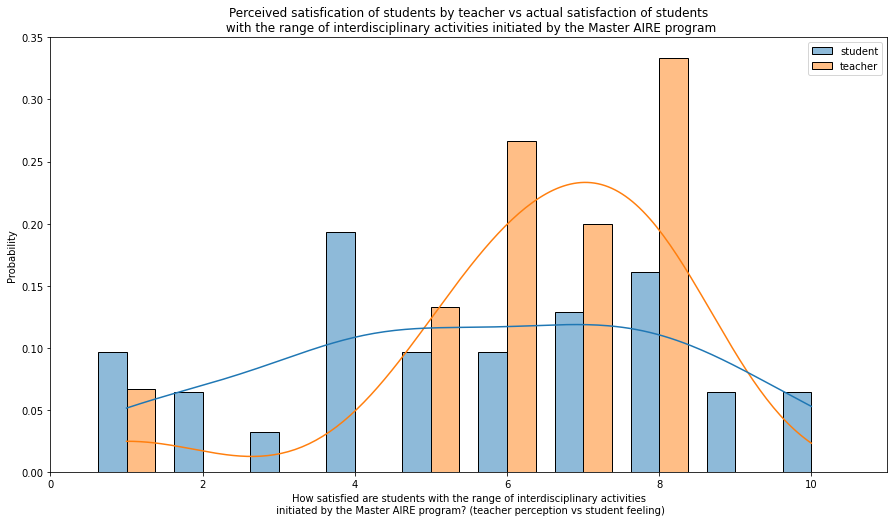

In [45]:
# plot melted dataframe in a single command
plt.figure(figsize = (15,8))
plt.xlim(0, 11)
plt.xlabel('How satisfied are students with the range of interdisciplinary activities\n initiated by the Master AIRE program? (teacher perception vs student feeling)') 
  
# displaying the title
plt.title("Perceived satisfication of students by teacher vs actual satisfaction of students\n with the range of interdisciplinary activities initiated by the Master AIRE program")

sns.histplot([result3['student'], result3['teacher']], stat = 'probability', kde = True, multiple='dodge', discrete = True, common_norm=False, shrink=.75, bins=5, common_bins= True);

In [ ]:
#df = data.rename(columns={"What's your track?": "track", "How old are you?": "age", "Please describe what the term interdisciplinarity means to you?": 'Int_def', "How important do you think interdisciplinary work is for your field?":'work_imp', "How important do you think interdisciplinarity is for society in general?": 'society_imp', "How would you rate the ability of the curriculum proposed by the AIRE Master to meaningfully connect a variety of disciplines?":'curiculum_track', "How would you assess the cross conversation between different tracks of the AIRE Master?": 'conersation_track', "How would you rate the AIRE program in terms of its ability to offer opportunities for students to interact with teachers of other tracks?":'talk_with_other_track_teachers', "How would you assess the interdisciplinarity of the classes during the Bootcamp?":'Botcamp_int', "How would you rate the degree of interdisciplinarity of the courses delivered during the AIRE Master?": 'courses_int', "How would you rate the ability of the projects proposed by the AIRE Master to reach out to a plurality of disciplines?": 'plurality_disc', "How satisfied are you with the range of interdisciplinary activities initiated by the Master AIRE program?": 'int_satisfaction', "Please provide any suggestions on how the current status of interdisciplinary activities at the CRI can be improved":'suggestion'})
df = data.set_axis(['Timestamp', 'track', 'age', 'Gender', 'interdisci_def', 'workin_imp', 'society_imp', 'curiculum_track', 'conversation_track', 'talk_with_other_track_teachers', 'Botcamp_int', 'courses_int', 'plurality_disc', 'int_satisfaction', 'suggestion'], axis='columns')


In [ ]:
df['track'] = df['track'].replace({'M1 Digital Sciences': 'Digital', 'M2 Digital Sciences': 'Digital', 'M1 Learning Sciences':'Learning', 'M2 Learning Sciences':'Learning', 'M1 Life Sciences':'Life', 'M2 Life Sciences':'Life'})
df['Gender'] = df['Gender'].replace({"Female": 0, "Male": 1, "Non-binary": 2})

In [ ]:
df.head(
)

d = df[df.track == 'Digital']
li = df[df.track == 'Life']
le = df[df.track == 'Learning']
d.head()

,Timestamp,track,age,Gender,interdisci_def,workin_imp,society_imp,curiculum_track,conversation_track,talk_with_other_track_teachers,Botcamp_int,courses_int,plurality_disc,int_satisfaction,suggestion
0,11/27/2021 12:49:44,Digital,28,1,one field interacting with another,7,8,5,4,3,3,4,4,2,NaN
1,11/28/2021 23:10:42,Digital,29,0,NaN,8,10,4,6,4,2,3,4,4,NaN
2,11/30/2021 12:29:04,Digital,29,1,different backgrounds,9,9,10,7,6,7,9,9,9,organize groups for open projects but not graded
3,12/1/2021 16:12:01,Digital,28,1,The combination of different sciences,7,8,6,5,7,4,5,5,6,NaN
4,12/1/2021 16:13:28,Digital,29,0,Combination of different disciplines in education,7,9,5,4,4,5,5,4,4,NaN


In [ ]:
d_meadian = d[['workin_imp', 'society_imp', 'curiculum_track', 'conversation_track', 'talk_with_other_track_teachers', 'Botcamp_int', 'courses_int', 'plurality_disc', 'int_satisfaction']].median()
le_meadian = le[['workin_imp', 'society_imp', 'curiculum_track', 'conversation_track', 'talk_with_other_track_teachers', 'Botcamp_int', 'courses_int', 'plurality_disc', 'int_satisfaction']].median()
li_meadian = li[['workin_imp', 'society_imp', 'curiculum_track', 'conversation_track', 'talk_with_other_track_teachers', 'Botcamp_int', 'courses_int', 'plurality_disc', 'int_satisfaction']].median()

d_meadian

workin_imp                        9.0
society_imp                       9.5
curiculum_track                   6.0
conversation_track                5.0
talk_with_other_track_teachers    4.5
Botcamp_int                       3.0
courses_int                       5.0
plurality_disc                    6.0
int_satisfaction                  4.5
dtype: float64

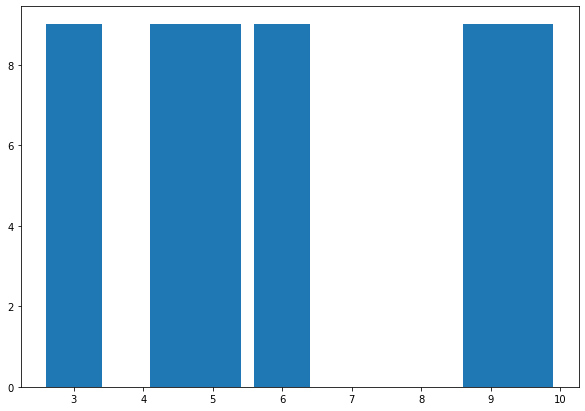

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(d_meadian, len(d_meadian))
 
# Show Plot
plt.show()

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Run below comand if you are running IPython

% matplotlib inline

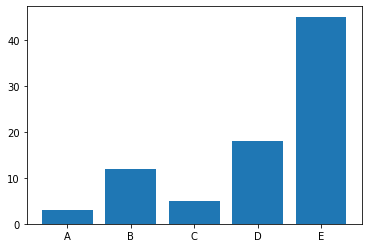

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [ ]:
df["interdisci_def"]

0                   one field interacting with  another
1                                                   NaN
2                                 different backgrounds
3                 The combination of different sciences
4     Combination of different disciplines in education
5     Doing stuff with people in fields I am not fam...
6                                  curious and creative
7                                                   NaN
8     Bringing together two or more disciplines to b...
9     When people with different backgrounds work on...
10    Not being connected to just one field, using s...
11    As for me, interdisciplinarity literally means...
12    facilitated collaboration between different tr...
13    Interdisciplinarity for me is the freedom to c...
14    To me it means the convergence of multiple fie...
15                     connecting multiple disciplines 
16       It is the involvement of many different fields
17                     Culmination of different 

There are 2408 words in the combination of all cells in column BLOOM.


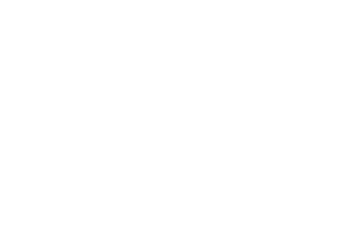

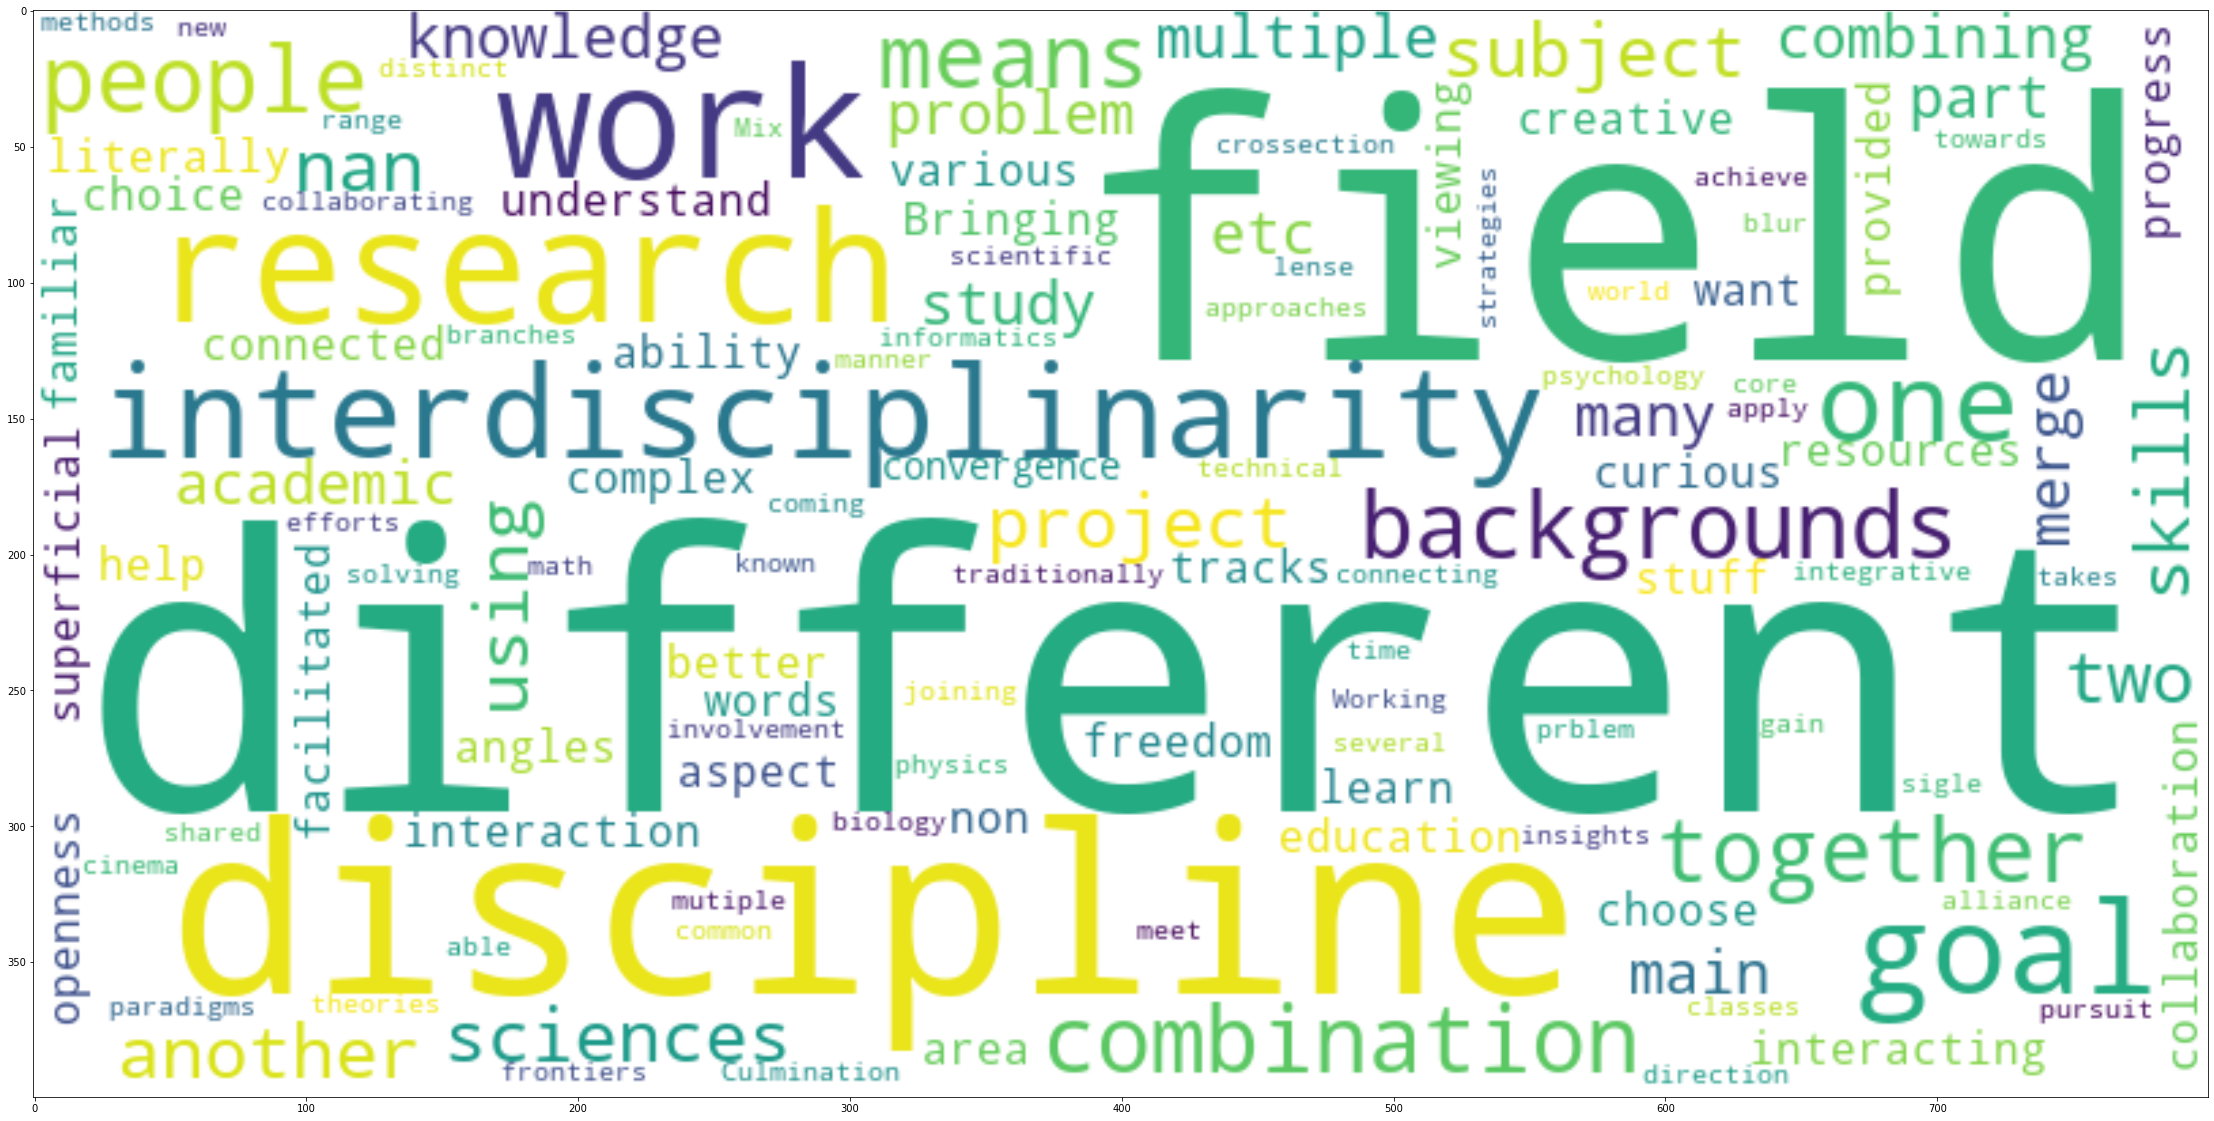

In [ ]:
#  Python program to generate WordCloud for column BLOOM

# Text of all words in column bloom

text = " ".join(review for review in df['interdisci_def'].astype(str))
print ("There are {} words in the combination of all cells in column BLOOM.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
stopwords.update(["bloom", "rose", "petals", "Average", "diameter","flushes", 'throughout', "Blooms", "form"])

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()